In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Анализ рынка продаж компьютерных игр**

**Основные задачи проекта:** 

+ проанализировать, как менялись продажи по платформам в течение рассматриваемого периода;
+ определить отраслевых лидеров и выявить потенциально прибыльные платформы;
+ составить портрет пользователей по регионам Северной Америки, Европы и Японии; 

**План работ:**

+ выявить динамику выпуска игр и продаж по годам и платформам 
+ определить лидирующие по продажам платформы, посмотреть, какие платформы растут, какие падают
+ проверить влияние на продажи отзывов пользователей и критиков
+ построить распределение игр по жанрам и посмотреть, как влияют жанры на продажи
+ составить портрет пользователей по регионам, используя информацию по платформам и  жанрам, посмотреть влияет ли рейтинг ESRB на продажи в регионах

## **Подготовка данных**

In [3]:
! gdown 11ucTQtGyR7iSoJOO7J-cXi6ZN7Dir5bx

Downloading...
From: https://drive.google.com/uc?id=11ucTQtGyR7iSoJOO7J-cXi6ZN7Dir5bx
To: /content/games.csv
100% 1.18M/1.18M [00:00<00:00, 71.1MB/s]


In [4]:
data = pd.read_csv('/content/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
plt.rcParams["figure.figsize"] = (12,6)

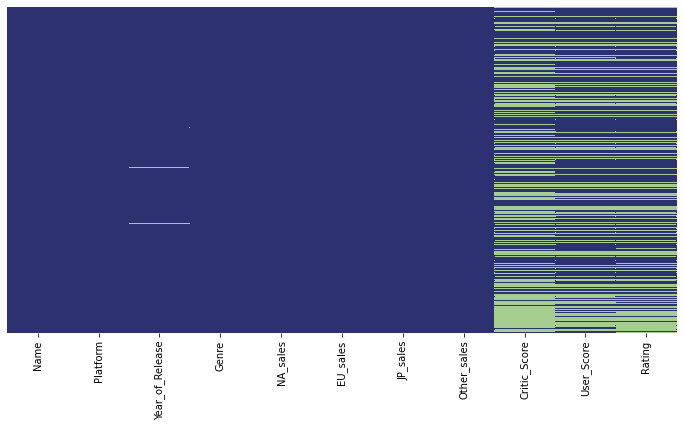

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='crest_r')

In [ ]:
data.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

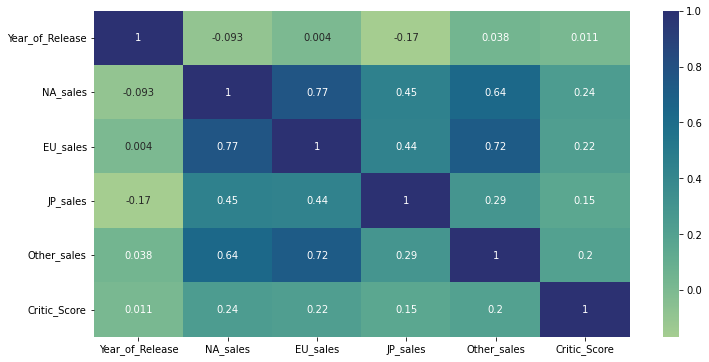

In [ ]:
sns.heatmap(data.corr(), annot = True, cmap = 'crest')

### **Предобработка данных**

In [6]:
data.columns = data.columns.str.lower()

In [ ]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data = data.dropna(subset=['name', 'genre']).copy()

In [8]:
data['year_of_release'] = data['year_of_release'].fillna(0)

In [9]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце 'user_score' у нас вещественные числа, поэтому здесь нам нужен тип данных float. Однако прежде чем преобразовывать, нужно заменить текстовое значение tbd, которое означает to_be_determined ('пока не определено'), т.е. для этих игр пока не набрано минимальное кол-во отзывов, чтобы просчитать рейтинг. Поскольку, по сути, у нас тут данных пока нет, заменим tbd на NaN.

In [10]:
data['user_score'] = data['user_score'].where(data.user_score != 'tbd', np.NaN)

In [11]:
data['user_score'] = data['user_score'].astype('float')

Создадим столбец с суммарными продажами

In [12]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## **Исследовательский анализ данных**

### **Сколько игр выпускалось в разные годы и какой был объем продаж**

In [13]:
sns.set()

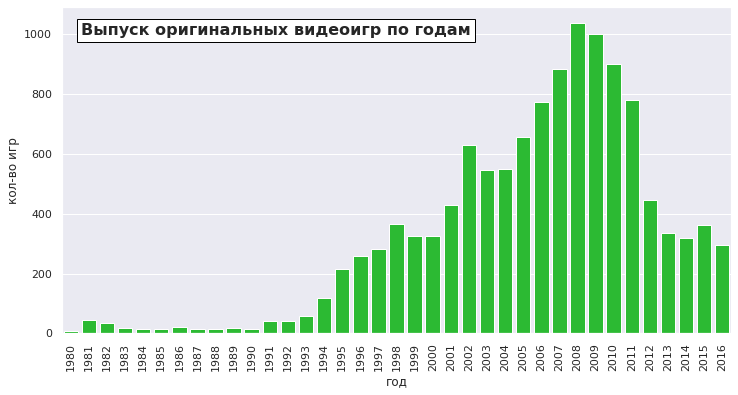

In [160]:
fig, ax = plt.subplots(figsize = (12,6))

games_cnt = data.query('year_of_release > 0').pivot_table(index='year_of_release', values='name', aggfunc='nunique').reset_index()
ax = sns.barplot(x='year_of_release', y='name', data=games_cnt, ci = None, color='#14D21E')
plt.title('Выпуск оригинальных видеоигр по годам', fontsize=16, fontweight='bold', \
          pad=5, bbox=dict(fc='white', ec='black'), x=0.32, y=0.9)
plt.xlabel('год')
plt.ylabel('кол-во игр')
plt.xticks(rotation=90);

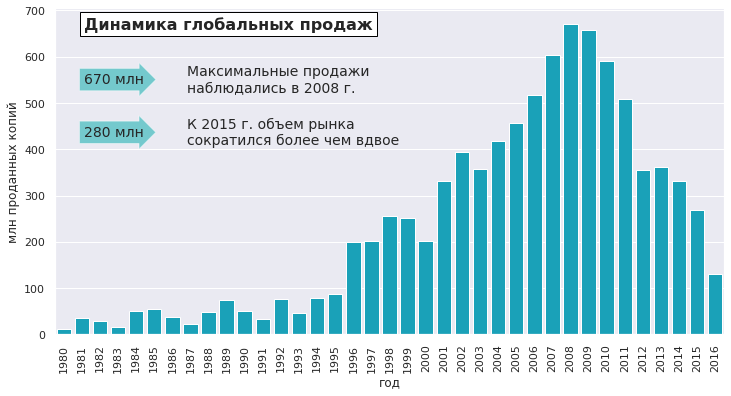

In [161]:
fig, ax = plt.subplots(figsize = (12,6))

sales = data.query('year_of_release > 0')
ax = sns.barplot(x='year_of_release', y='total_sales', data=sales, estimator = np.sum, ci = None, color='#00B4D2')

plt.title('Динамика глобальных продаж', fontsize=16, fontweight='bold', pad=5, bbox=dict(fc='white', ec='black'), x=0.26, y=0.92)
plt.text(6.8, 524, 'Максимальные продажи' + '\n' + 'наблюдались в 2008 г.', fontsize=14)
plt.text(1.1, 542,'670 млн', fontsize=14, bbox=dict(fc='#00AAAA', alpha=0.5, boxstyle='rarrow'))
plt.text(6.8, 410, 'К 2015 г. объем рынка' + '\n' + 'сократился более чем вдвое', fontsize=14)
plt.text(1.1, 428,'280 млн', fontsize=14, bbox=dict(fc='#00AAAA', alpha=0.5, boxstyle='rarrow'))
plt.xlabel('год')
plt.ylabel('млн проданных копий')
plt.xticks(rotation=90);

По гистограммам видно, что активный рост на рынке видеоигр наблюдался примерно с середины 1990-х гг. В 1980-х гг. рынок фактически находился в зачаточном состоянии (количество выпускавшихся игр не превышало 50 наименований в год). 

Практически то же самое распределение мы видим и на гистограмме продаж игр по годам: довольно маленький объем рынка до 1996 года (менее 100 млн продаваемых копий ежегодно) и резкий рост продаж до 200 млн в 1996 году. При этом расцвет рынка компьютерных игр пришелся на 2008-2009 гг., после чего наблюдается ярко выраженное снижение как кол-ва выпускаемых игр, так и, соответственно, объемов продаж. 

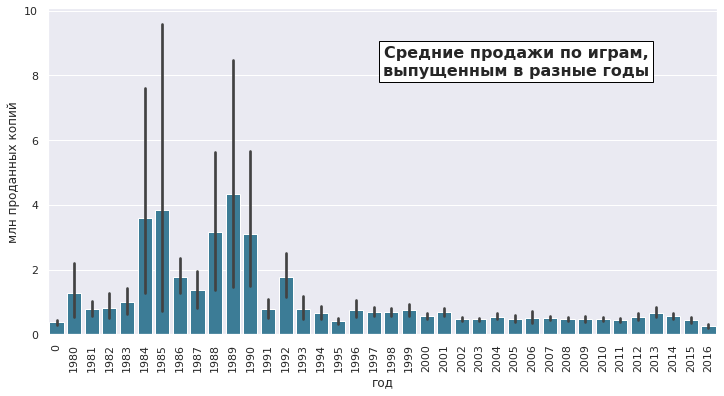

In [162]:
fig, ax = plt.subplots(figsize = (12,6))

ax = sns.barplot(x='year_of_release', y='total_sales', estimator=np.mean, data=data, color='#2D82A5')

plt.title('Средние продажи по играм,' + '\n' + 'выпущенным в разные годы', fontsize=16, fontweight='bold', pad=5, bbox=dict(fc='white', ec='black'), x=0.7, y=0.78)
plt.xlabel('год')
plt.ylabel('млн проданных копий')
plt.xticks(rotation=90);

Примечательно, что максимальные средние показатели объемов продаж из расчета на одну оригинальную видеоигру, напротив, смещены левее и наблюдались на этапе становления рынка, а не его расцвета. Это вполне объяснимо: игр было еще немного и выбор и покупателей был ограничен. В этот же период наблюдается и наибольший размах по средним значениям: разница в объемам продаж игр была существенной. По мене роста кол-ва выпускаемых игр средние продажи из расчета на одну игру снизились и более 20 лет находились примерно на одном уровне. При этом такой существенной разницы между объемами продаж по отдельным играм, как в ранний период, уже не наблюдалось.

### **Как менялись продажи на крупнейших платформах по годам**

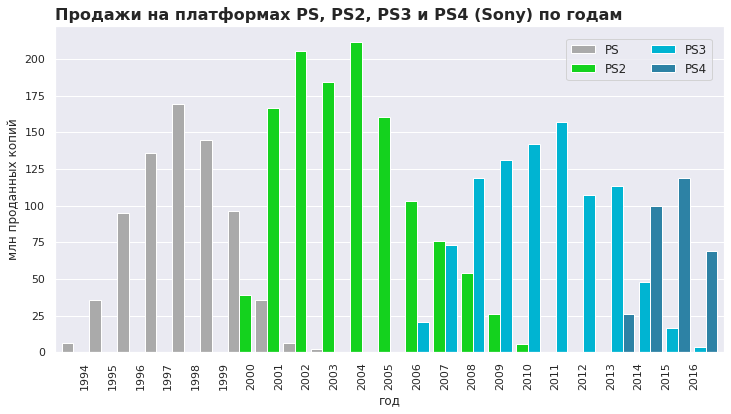

In [40]:
# colors = sns.color_palette('gist_earth')
colors = '#AAAAAA', '#14D21E', '#00B4D2', '#2D82A5'
(
    data.query('(year_of_release > 1991)&(platform in ["PS", "PS2", "PS3", "PS4"])')
    .pivot_table(index='year_of_release', columns='platform', \
             values='total_sales', aggfunc='sum')
    .plot(kind='bar', width=1.7, figsize=(12,6), color=colors)
)
plt.title('Продажи на платформах PS, PS2, PS3 и PS4 (Sony) по годам', fontsize=16, fontweight='bold', loc='left')
plt.legend(ncol=2, loc='upper right', fontsize=12, bbox_to_anchor=(0.99, 0.98))
plt.xlabel('год')
plt.ylabel('млн проданных копий')
plt.grid(axis='x');

По гистограмме хорошо видно, что жизненный цикл одной платформы у Sony в плане выпускаемых для нее игр составляет в среднем 10 лет. С появлением новой платформы примерно в первые пять лет идет активный рост продаж игр для нее, после чего наблюдается сокращение продаж, который у Sony совпадает с выпуском на рынок новой платформы и наращиванием продаж игр новой линейки. 
Посмотрим, как обстоят дела у главного конкурента Sony - компании Nintendo. 

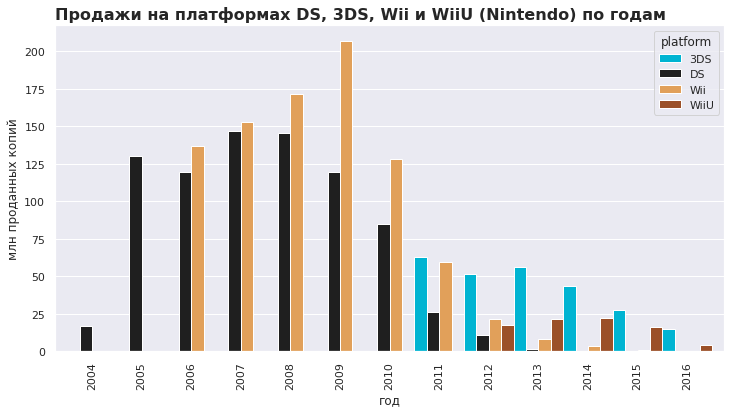

In [100]:
colors=['#00B4D2', '#1F1F1F', '#E1A05A', '#9B5028', '#E1A05A', '#1F1F1F']
(
    data.query('(year_of_release > 2001)&(platform in ["DS", "3DS", "Wii", "WiiU"])')
    .pivot_table(index='year_of_release', columns='platform', \
             values='total_sales', aggfunc='sum').plot(kind='bar', width=1, figsize=(12,6), color=colors)
)
plt.title('Продажи на платформах DS, 3DS, Wii и WiiU (Nintendo) по годам', fontsize=16, fontweight='bold', loc='left')
plt.xlabel('год')
plt.ylabel('млн проданных копий')
plt.grid(axis='x')

У Nintendo также просматривается ограниченный жизненный цикл платформ, который составляет в среднем 9 лет. При этом платформы Nintendo теснее "пересекаются" друг с другом. Кроме того, стоит отметить, что Nintendo не удалось "поддержать" успех платформ DS и Wii на версиях нового поколения: продажи игр для платформ 3DS и WiiU оказалось заметно скромнее.

И, наконец, посмотрим распределение продаж по годам для третьего крупнего игрока на рынке - компании Microsoft (платформы X360 и XOne). Сюда же добавим данные по играм PC. Хотя эта платформа, в отличие от остальных, децентрализована и не принадлежит какой-то отдельной компании, Microsoft является, безусловно, одним из ключевых поставщиков игр для этой платформы.

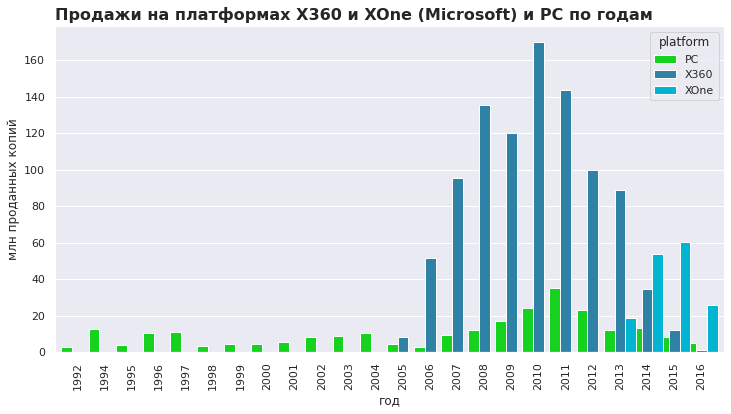

In [64]:
colors = ['#14D21E', '#2D82A5', '#00B4D2', '#FFBE1E', '#FFEB50', '#9B5028', '#E1A05A', '#1F1F1F']
(
    data.query('(year_of_release > 1991)&(platform in ["X360", "XOne", "PC"])')
    .pivot_table(index='year_of_release', columns='platform', \
             values='total_sales', aggfunc='sum').plot(kind='bar', width=1.2, figsize=(12,6), color=colors)
)
plt.title('Продажи на платформах X360 и XOne (Microsoft) и PC по годам', fontsize=16, fontweight='bold', loc='left')
plt.xlabel('год')
plt.ylabel('млн проданных копий')
plt.grid(axis='x')

Мы видим, что платформа X360 очень успешно показала себя на рынке - ее жизненный цикл превысил 10 лет, а совокупные продажи на пиковых значениях превышали 140 млн копий в год. XOne, в свою очередь, новый игрок на рынке и находится в стадии роста. 
Интересно, что у игр для PC самый длинный жизненный цикл, при этом довольно небольшие объемы продаж, не превышающиеся 40 млн копий в год, по сравнению с платформами, которые контролируются отдельными компаниями.

In [75]:
data.groupby('platform')['year_of_release'].nunique().sort_values(ascending=False).mean()

8.193548387096774

### **Анализ актуального периода для рынка видеоигр**

Учитывая, что жизненный цикл подавляющего большинства платформ (единственное исключение - PC) составляет в среднем 8 лет, для дальнейшего анализа перспектив продаж на рынке видеоигр имеет смысл брать период не более последних трех лет (т.е. 2014-2016 гг.), поскольку нам нужно выделить платформы и жанры, имеющие потенциал к росту. 

Посмотрим, какие платформы вышли в топ продаж в этот период.

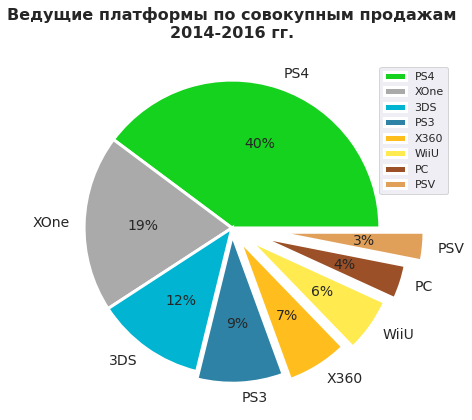

In [95]:
stats = (
    data.query('year_of_release > 2013')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).query('total_sales > 20')
)

labels = stats.index
explode = (0, 0, 0, 0.05,0.1,0.15,0.2,0.3)
colors = ['#14D21E', '#AAAAAA', '#00B4D2', '#2D82A5','#FFBE1E', '#FFEB50', \
          '#9B5028', '#E1A05A', '#1F1F1F']

stats.plot(kind='pie', y='total_sales', figsize=(9,6), fontsize=14,colors=colors, \
           explode=explode, ylabel='', autopct='%.0f%%', \
           wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, labeldistance=1.1)
plt.legend(labels=labels, loc='upper right', bbox_to_anchor=(1.1, 0.95))
plt.title('Ведущие платформы по совокупным продажам' + '\n' + '2014-2016 гг.', fontsize=16, fontweight='bold')
plt.tight_layout();

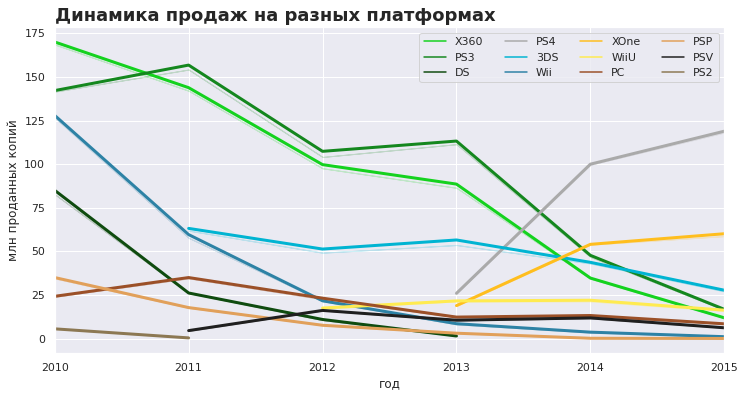

In [81]:
fig, ax = plt.subplots(figsize = (12,6))
colors= ['#14D21E', '#14871E', '#0F4B0F', '#AAAAAA', '#00B4D2', '#2D82A5','#FFBE1E', '#FFEB50', '#9B5028', '#E1A05A', '#1F1F1F', '#8C7853']

g1 = data.query('(year_of_release > 2009)&(year_of_release < 2016)&(total_sales > 0)')[['year_of_release', 'total_sales', 'platform']]

sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=g1, estimator=np.sum, ci=False, palette=colors, linewidth=3)
plt.title('Динамика продаж на разных платформах', fontsize=18, fontweight='bold', loc='left')
plt.legend(ncol=4, loc='upper right')
plt.xlabel('год')
plt.ylabel('млн проданных копий')
plt.xlim(2010, 2015)
plt.show();

Мы видим, что продажи по большинству платформ к 2015 году уже находятся в нисходящем тренде. Потенциал к росту просматривается лишь у двух платформ: PS4, о которой уже говорилось ранее, и XOne, принадлежащей Microsoft. Именно эти две платформы можно выделить как потенциально прибыльные на ближайшие несколько лет. 

Посмотрим на медианные значения и межквартильный размах продаж по актуальным платформам.

Text(0, 0.5, 'продажи, млн копий')

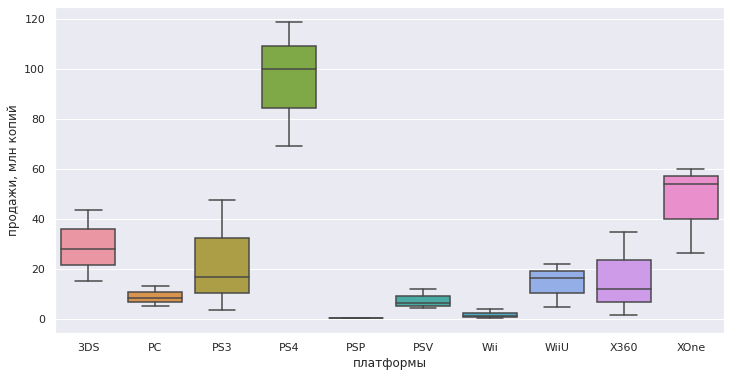

In [102]:
box_plat = data.query('year_of_release > 2013').groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
sns.boxplot(x='platform', y='total_sales', data=box_plat, showfliers=False)
plt.xlabel('платформы')
plt.ylabel('продажи, млн копий')

По графику видно, что наибольшие продажи сумели сгенерировать платформы PS4, PS3, XOne, X360 и 3DS - у них самый "мощный" межквартильный размах, более высокие значения третьего квартиля, чем у конкурентов и значительно превышающие конкурентов значения максимальных объемов продаж. При этом на первом месте опять-таки оказались платформы PS4 и XOne, что подтверждает предыдущие выводы.  

### **Самые популярные жарны**

Посмотрим теперь на зависимость продаж от игровых жанров: какие жанры более популярные, какие - нет.

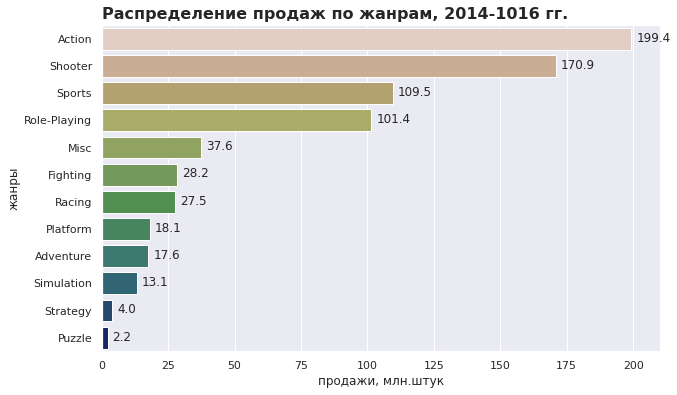

In [97]:
fig, ax = plt.subplots(figsize = (10,6))

genres = data.query('year_of_release > 2013').groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

ax = sns.barplot(y=genres['genre'], x=genres['total_sales'], palette='gist_earth_r')
plt.title('Распределение продаж по жанрам, 2014-1016 гг.', fontsize=16, fontweight='bold', loc='left')
plt.xlabel('продажи, млн.штук')
plt.ylabel('жанры')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.87),
                xytext=(5, 10), textcoords='offset points')
plt.xlim(0, 210)
plt.show();

Если смотреть по объемам продаж, определенным лидером остается жанр "экшн" (почти 200 млн проданных копий за актуальный период). Второе место занимают "шутеры" (ок. 170 млн проданных копий). На третьем и четвертом местах с небольшим отрывом - спортивные игры (110 млн) и ролевые игры (101 млн). Именно эту четверку можно выделить как наиболее перспективную при планировании продаж на ближайший год-два. 
Остальные жанры генерируют в разы меньшие продажи. При этом самые низкие показатели наблюдаются у паззлов и стратегий.

Text(0, 0.5, 'продажи, млн копий')

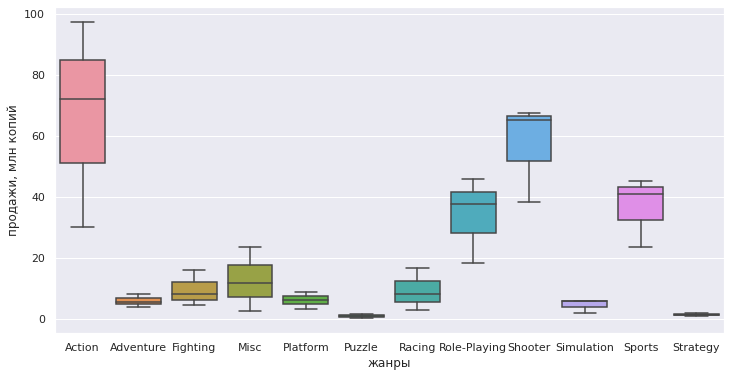

In [104]:
box_genres = data.query('year_of_release > 2013').groupby(['year_of_release', 'genre'])['total_sales'].sum().reset_index()
sns.boxplot(x='genre', y='total_sales', data=box_genres, showfliers=False)
plt.xlabel('жанры')
plt.ylabel('продажи, млн копий')

Показатели медианных продаж и межквартильного размаха подтверждают предыдущие выводы: в топ-4 жанров, обеспечивающих наибольшие медианные продажи, а также высокие продажи в целом, входят "экшн", "шутеры", спортивные и ролевые игры. Можно прогнозировать, что эта "четверка" будет обеспечивать стабильные продажи и на ближайшие год-два.

### **Влияние отзывов критиков и пользователей на продажи**

Посмотрим, есть ли корреляции между отзывами критиков или пользовательскими оценками и объемами продаж игр для самой популярной платформы - PS4

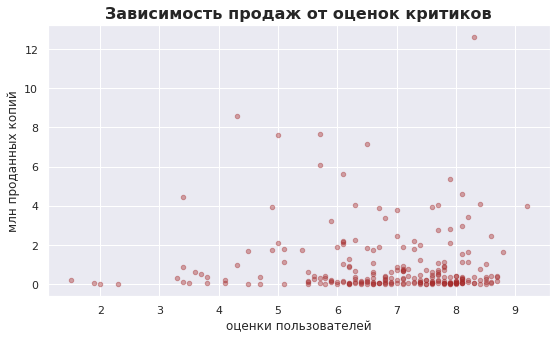

In [114]:
(
    data.query('(platform == "PS4")&(critic_score > 0)&(year_of_release > 2013)')
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, \
          figsize=(9, 5), color='brown', grid=True)
)
plt.title('Зависимость продаж от оценок критиков', fontsize=16, fontweight='bold')
plt.xlabel('оценки пользователей')
plt.ylabel('млн проданных копий');

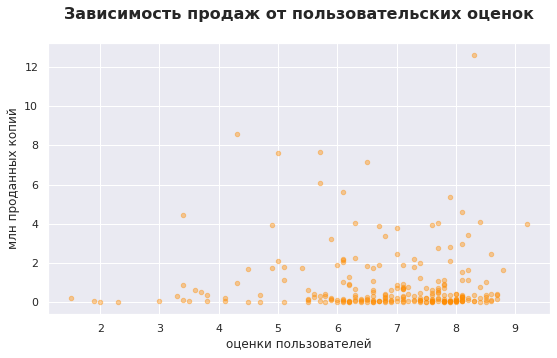

In [115]:
(
    data.query('(platform == "PS4")&(user_score > 0)&(year_of_release > 2013)')
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, \
          figsize=(9, 5), color='DarkOrange', grid=True)
)
plt.title('Зависимость продаж от пользовательских оценок' + '\n', fontsize=16, fontweight='bold')
plt.xlabel('оценки пользователей')
plt.ylabel('млн проданных копий');

Диаграммы рассеивания показывают, что никакой существенной корреляции между отзывами и продажами не фиксируется для платформы PS4. На средних и высоких оценках наблюдается большой вертикальный разброс продаж, т.е. игры с одними и теми же оценками  продавались как очень хорошо, так и плохо.

Посмотрим корреляционные взаимоотношений между оценками и продажами для других ведущих платформ в актуальный период.

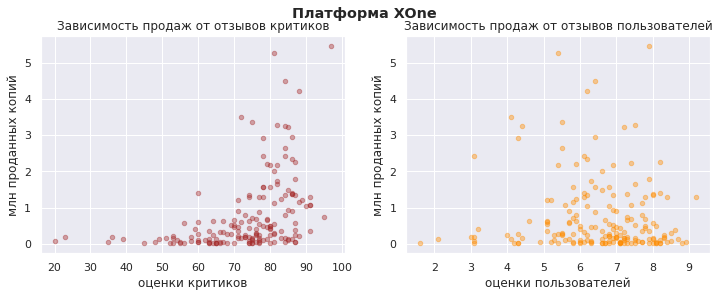

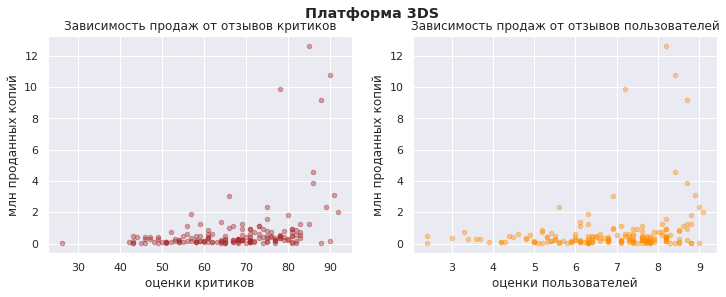

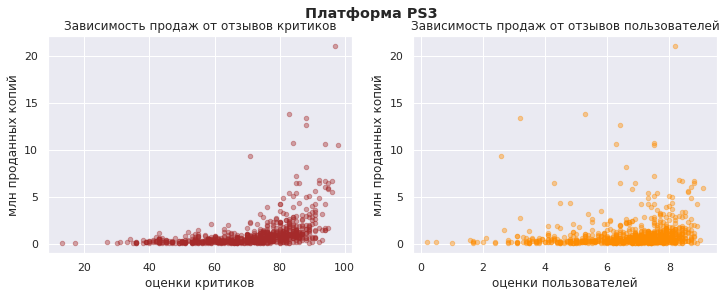

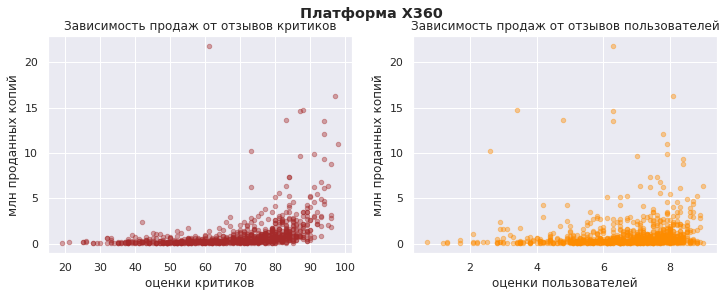

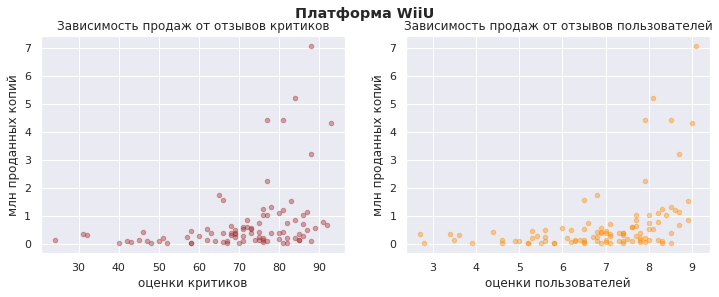

In [117]:
top5 = (
    data.query('(platform != "PS4")&(year_of_release > 2013)')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .nlargest(5, columns='total_sales').index
)

for i in top5:
  fig, ax=plt.subplots(ncols=2, figsize=(12, 4))
  data[data['platform'] == i].plot.scatter(x='critic_score', \
                                           y='total_sales', ax=ax[0], alpha=0.4, color='brown', grid=True)
  ax[0].set_title('Зависимость продаж от отзывов критиков')
  ax[0].set_xlabel('оценки критиков')
  ax[0].set_ylabel('млн проданных копий') 

  data[(data['platform'] == i)&(data['user_score'] > 0)].plot.scatter(x='user_score', y='total_sales', \
                                                                      ax=ax[1], alpha=0.4, color='DarkOrange', \
                                                                      grid=True)
  ax[1].set_title('Зависимость продаж от отзывов пользователей')
  ax[1].set_xlabel('оценки пользователей')
  ax[1].set_ylabel('млн проданных копий');
  fig.suptitle(f'Платформа {i}', fontweight='bold')

На других платформах ситуация, схожая с PS4: существенной корреляции между отзывами критиков и пользователей и продажами не наблюдается. Из чего можно сделать вывод, что планирование продаж с опорой на показатели оценок не имеет особого смысла.

## **Портрет пользователей по регионам**

In [130]:
def reg_plat (df, region, name, axes):
    
    df = df.query('year_of_release > 2013')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    sales.columns = ['platform', 'sales']
    colors = ['#00B4D2', '#2D82A5','#FFBE1E', '#FFEB50', '#9B5028', '#E1A05A']

    sales.plot(kind='pie',
               y="sales",
               autopct='%1.0f%%',
               wedgeprops=dict(width=.6), 
               textprops={'size': 'small'}, labels = sales.platform,
               colors=colors,
               legend=False, 
               title = f"{name} ", fontsize=12, 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()
  

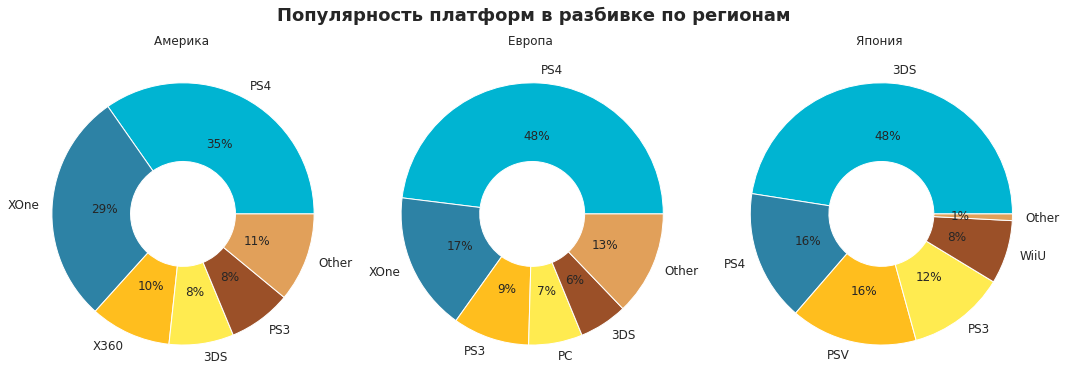

In [131]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Популярность платформ в разбивке по регионам', fontsize = 18, fontweight='bold')

reg_plat(data, 'na_sales', 'Америка', axes[0])
reg_plat(data, 'eu_sales', 'Европа', axes[1])
reg_plat(data, 'jp_sales', 'Япония', axes[2])
plt.show()

Примечательно, что ведущие позиции во всех трех регионах занимают 
японские производители, хотя можно было бы ожидать, что по крайней мере в Северной Америке первое место займет XOne от Microsoft. Впрочем, XOne на американском рынке лишь немного уступает лидеру - платформе PS4. Если "японец" занимает 35% рынка, то у XOne - 29%. 

Пользователи Европы демонстрируют схожие "вкусы" с американцами при выборе игровых платформ: и там, и там на первом месте PS4, а на втором - XOne. А вот в
Японии в лидеры вышла 3DS - на долю этой платформы приходится почти половина продаж на японском рынке. Вообще, надо отметить, что японцы демонстрируют максимальный патриотизм при выборе платформы: здесь вся "пятерка" крупнейших платформ принадлежит японским производителям. На них приходится 99% всех местных продаж.

In [139]:
gen_sales = data.query('year_of_release > 2013').pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales'). reset_index()
gen_sales.columns = ['genre', 'sales']
gen_sales = gen_sales.append({'genre': 'Other', 'sales': data['na_sales'].sum() - sales['na_sales'].sum()}, ignore_index= True)
gen_sales

,genre,sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Other,59.15


In [ ]:
gen_sales.plot(kind='pie',
               y="sales",
               autopct='%1.0f%%',
               wedgeprops=dict(width=.6), 
               textprops={'size': 'small'}, labels = sales.platform,
               colors=colors,
               legend=False, 
               title = f"{name} ", fontsize=12, 
               ax = axes).set(ylabel='')

In [142]:
def reg_genre (df, region, name, axes):
    
    df = df.query('year_of_release > 2013')
    
    gen_sales = df.pivot_table(index='genre', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    gen_sales = gen_sales.reset_index()
    
    gen_sales = (
            gen_sales.append({'genre': 'Other', region: df[region].sum() 
                       - gen_sales[region].sum()}, ignore_index= True)
         )
    gen_sales.columns = ['genre', 'sales']
    colors = ['#14D21E', '#AAAAAA', '#00B4D2', '#2D82A5','#FFBE1E', '#FFEB50']

    gen_sales.plot(kind='pie',
               y="sales",
               autopct='%1.0f%%',
               wedgeprops=dict(width=.6), 
               textprops={'size': 'small'}, labels = gen_sales.genre,
               colors=colors,
               legend=False, 
               title = f"{name} ", fontsize=12, 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

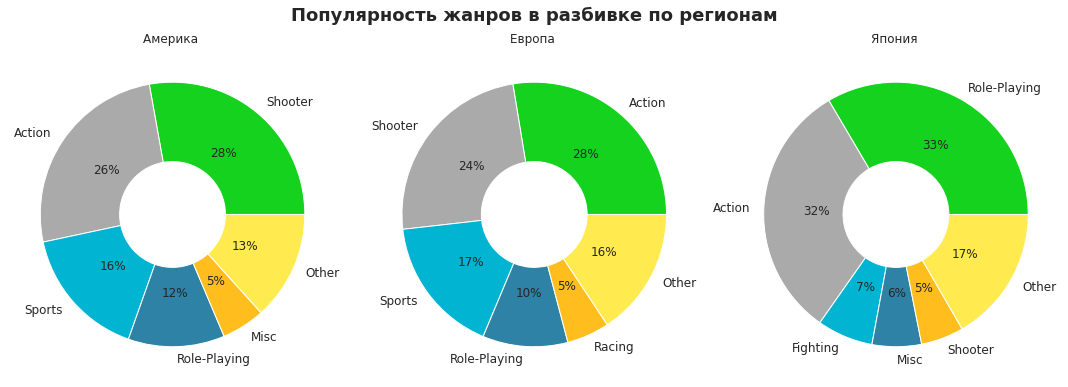

In [143]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Популярность жанров в разбивке по регионам', fontsize = 18, fontweight='bold')

reg_genre(data, 'na_sales', 'Америка', axes[0])
reg_genre(data, 'eu_sales', 'Европа', axes[1])
reg_genre(data, 'jp_sales', 'Япония', axes[2])
plt.show()

Интересно, что во всех регионах на первом месте оказались разные жанры. Хотя разница между пользователями в Сев.Америке и Европе несущественная: если в Америке на первом месте игры в жанре "экшн" (28%), а на втором - "шутеры" (24%), то в Европе первые две строчки занимают те же жанры, только в другом порядке: "шутеры" на первом месте (28%), "экшн" - на втором (26%). И там, и там на два этих жанра приходится более половины всех продаж видеоигр в последние три года. 

Японские игроки несколько отличаются по жанровым предпочтениям: здесь на первое место выходят ролевые игры (33%) рынка. На втором месте тот же "экшн", причем его доля в Японии даже больше, чем в Америке и в Европе - 32%. 

Можно сделать вывод, что ставка на игры в жанре "экшн" целесообразна в случае продаж, ориентированных на все регионы. Для западных покупателей также стоит обратить внимание на игры-"шутеры" и спортивные игры. Если продажи планируются в Японии - ролевые игры. 

### **Как влияет рейтинг ESRB на продажи в регионах**

Создадим отдельный столбец, где сгруппируем рейтинги ESRB по смысловым категориям: everybody (для всех, сюда отнесем рейтинги E и EC - early childhood, а также 'K-A', который применялся для обозначения категории 'everybody' до 1999 года), '10+' (сюда отнесем игры E10+ и T (teen) - для подростков), и наконец, 'adult_content' (AO - adult only и M - mild - наличие взрослого юмора, секса и насилия). RP заменим на 'non-rated', поскольку RP обозначает, что игра пока не получила рейтинг ESRB (rating pending). Пропущенные значения также заменим категорией non-rated.

In [150]:
esrb_rated = data.query('year_of_release > 2013')[['rating', 'na_sales', 'eu_sales', 'jp_sales']].copy()
esrb_rated.head()

,rating,na_sales,eu_sales,jp_sales
31,NaN,6.03,5.86,0.36
42,M,3.96,6.31,0.38
47,NaN,4.35,3.49,3.10
77,E,1.12,6.12,0.06
87,NaN,2.99,3.49,0.22


In [151]:
esrb_rated['rating'] = esrb_rated['rating'].fillna('non_rated')

In [152]:
def esrb_rating(x):
    if '10+' in x or 'T' in x:
        return '10+'
    elif 'E' in x or 'K-A' in x:
        return 'everybody'
    elif 'AO' in x or 'M' in x:
        return 'adult_content'
    elif 'RP' in x:
        return 'non_rated'
    return x

In [153]:
esrb_rated['rating'] = esrb_rated['rating'].apply(esrb_rating)

In [154]:
esrb_rated = esrb_rated.groupby('rating').sum().reset_index()
esrb_rated

,rating,na_sales,eu_sales,jp_sales
0,10+,72.18,60.23,19.24
1,adult_content,96.42,93.44,8.01
2,everybody,50.74,58.06,8.94
3,non_rated,64.72,58.95,56.90


In [156]:
esrb_rated = esrb_rated.melt('rating', var_name='a', value_name='b')

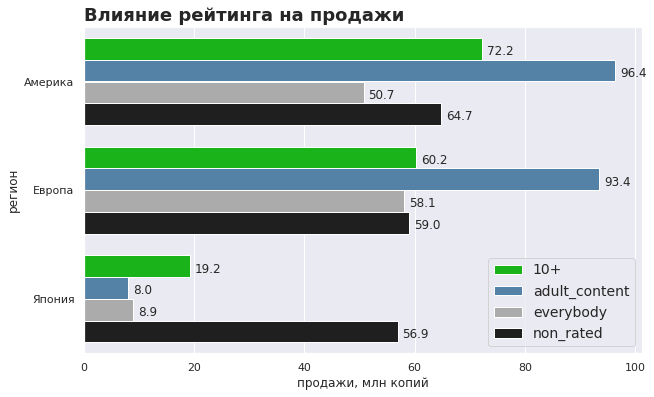

In [163]:
fig, ax = plt.subplots(figsize = (10,6))
colors=['#00CD00', '#4682B4', '#ABABAB', '#1F1F1F', '#00C5CD']
# order = ['everybody', '10+', 'adult_content', 'non_rated']
ax = sns.barplot(x='b', y='a', hue='rating', data=esrb_rated, palette=colors)

for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.25),
                xytext=(5, 10), textcoords='offset points')
    
plt.title('Влияние рейтинга на продажи', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('продажи, млн копий')
plt.ylabel('регион')
handles, labels = ax.get_legend_handles_labels()
labels=['Америка', 'Европа', 'Япония']
ax.set_yticklabels(labels)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14);

Мы видим, что в Северной Америке и Европе основная часть продаваемых игр приходится на игры, которые получили тот или иной рейтинг ESBR, в то время как в Японии наибольшие продажи генерируют игры, не получившие рейтинг ESBR. Такую ситуацию можно объяснять двояко: возможно, для пользователей Северной Америки и Европы наличие рейтинга является важным моментом, на который они обращают внимание при покупке игр, отдавая предпочтение "прорейтингованым" играм. В Японии же, рейтинг ESRB не является значимым фактором при выборе игры. 
Второе объяснение может заключаться в том, что ESRB - рейтинг изначально был создан под североамериканскую аудиторию и поэтому рейтинг автоматически проставляется для подавляющей части игр, попадающих на американский рынок. При этом активное присутствие прорейтинговых ESBR игр на европейском рынке объясняется тем, что игровые пристрастия американцев и европейцев очень близки.

По графику также видно, что игры с контентом для взрослых пользуются значительно меньшей популярностью у пользователей у Японии, нежели в Америке или Европе (в этих двух регионах игры со взрослым контентом стоят на первом месте по продажам). Можно сделать вывод, что наличие такого рейтинга влечет за собой меньшие продажи на японском рынке, чем в других регионах.

# **Общие выводы**

Активное развитие рынка компьютерных игр наблюдается с середины 1990-х гг. Если в 1980-х гг. количество выпускавшихся игр не превышало 50 наименований в год, то в середине 1990-х мы видим резкий рост как по объему выпускаемых игр, так и по объемам продаж. На пике развития рынка, который пришелся на 2008-2010 гг. выпускалось в общей сложности около 1000 оригинальных игр в год при совокупном объеме продаж, превышающем 650 млн копий. С начала 2010-х гг. фиксируется заметный спад по обоим показателям: к 2015 г. выпуск игр снизился ниже отметки в 400 наименований, а объем продаж упал ниже 300 млн копий в год.

Жизненный цикл одной платформы составляет в среднем 10 лет, после чего компания-производитель старается вывести на рынок новую платформу. Исключение составляет платформа PC, которая не принадлежит одному производителю и имеет самый длинный жизненный цикл, превышающий 20 лет. 

Топ-5 самых популярных платформ на сегодняшний момент - PS4, XOne, PS3, X360 и 3DS. На их долю приходится более 60% всех выпущенных игр. А лидером рынка по совокупным объемам проданных игр является платформа PS4. 

На момент исследования (2016 г.) продажи по большинству платформ находятся в нисходящем тренде. Потенциал к росту просматривается лишь у двух из них: PS4  и XOne. Можно прогнозировать, что игры для этих платформ будут генерировать хорошие продажи в ближайшие годы.

В плане жанровых предпочтений игроков лидируют "экшн"-игры. Они показывают стабильные продажи по всем регионам. Популярностью пользуются также "шутеры", спортивные и ролевые игры. 

При этом в разных регионах картина жанровых предпочтений несколько отличается. Так, пользователи в Северной Америке и Европе чаще покупают экшн-игры, шутеры и игры в жанре "спорт". А в Японии основная часть продаж приходится на "экшн" и ролевые игры.

Если делать прогноз по наиболее перспективным жанрам на предстоящие 2-3 года, можно выделить игры в жанре "экшн", "шутеры" и спортивные игры. Если планировать расширение продаж на японский рынок, необходимо также включить в портфель "ролевые игры", которые занимают в последние три года первую строчку в рейтинге популярности у японских пользователей.

Отличие по регионам наблюдаются и в выборе платформ: если в Северной Америке и Европе уверенно лидирует PS4, то в Японии пользователи отдают предпочтение DS3.

Анализ влияния пользовательских оценок и оценок критиков на продажи не показал какой-либо существенной корреляции, поэтому строить планы по продажам, исходя из этих показателей, не представляется целесообразным. Нельзя сделать и однозначных выводов относительно влияния рейтинга ESRB на продажи.
